<a href="https://colab.research.google.com/github/FitriFatimah6/TUBES-PROJECT-UAS/blob/main/Kel1_Visualisasi_Fish_Dataset(rs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# LOAD DATA
df = pd.read_csv("/content/joined_fish_data.csv")

# Format tanggal
df["catch_date"] = pd.to_datetime(df["catch_date"], errors='coerce')
df["capture_month"] = df["catch_date"].dt.to_period("M").astype(str)


# 1.HEATMAP KORELASI KONDISI PERAIRAN & FRESHNESS

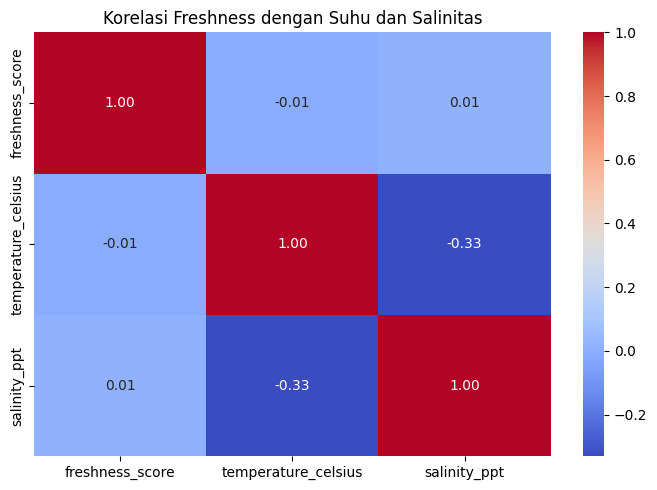

In [2]:
# 1. HEATMAP KORELASI KONDISI PERAIRAN & FRESHNESS
env_cols = ["freshness_score", "temperature_celsius", "salinity_ppt"]
plt.figure(figsize=(7, 5))
sns.heatmap(df[env_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Freshness dengan Suhu dan Salinitas")
plt.tight_layout()
plt.show()



# 2. BOXPLOT FRESHNESS PER METODE PENANGKAPAN

/tmp/ipython-input-3-130510055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="freshness_score", y="fishing_method", palette="Set2")


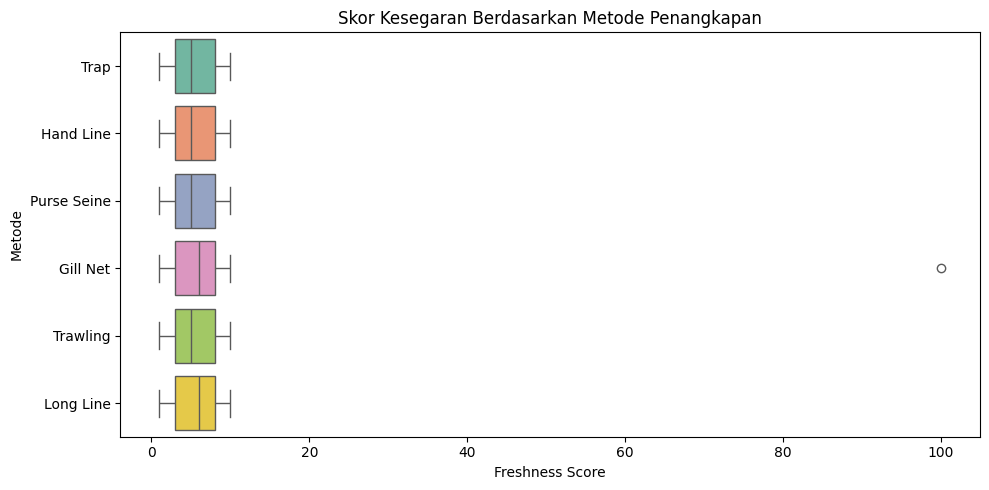

In [3]:
# 2. BOXPLOT FRESHNESS PER METODE PENANGKAPAN
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="freshness_score", y="fishing_method", palette="Set2")
plt.title("Skor Kesegaran Berdasarkan Metode Penangkapan")
plt.xlabel("Freshness Score")
plt.ylabel("Metode")
plt.tight_layout()
plt.show()



# 3. BARPLOT RATA-RATA FRESHNESS PER JENIS IKAN

/tmp/ipython-input-4-12408992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fish_avg, x="freshness_score", y="fish_name", palette="Set3")


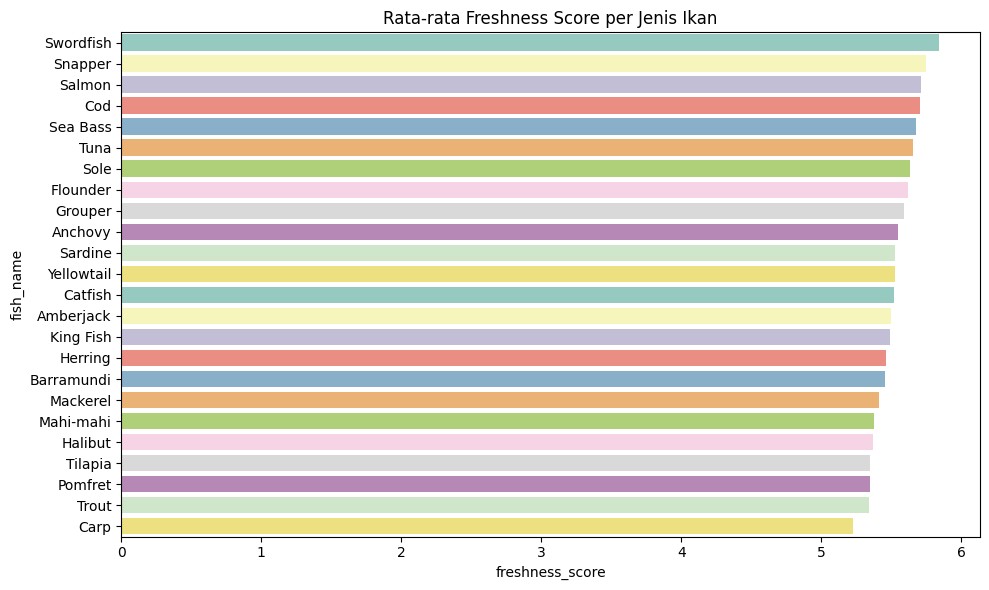

In [4]:
# 3. BARPLOT RATA-RATA FRESHNESS PER JENIS IKAN
fish_avg = df.groupby("fish_name")["freshness_score"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fish_avg, x="freshness_score", y="fish_name", palette="Set3")
plt.title("Rata-rata Freshness Score per Jenis Ikan")
plt.tight_layout()
plt.show()



# 4. BARPLOT FRESHNESS PER KATEGORI IKAN

/tmp/ipython-input-5-783178057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_avg, x="freshness_score", y="category_name", palette="pastel")


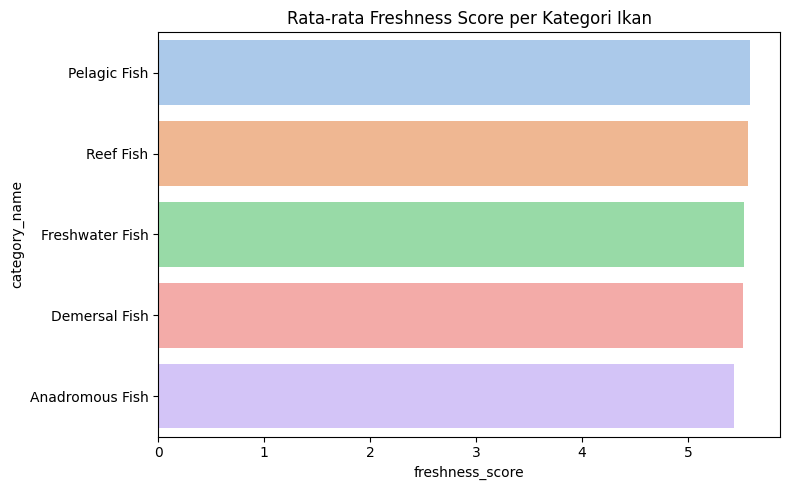

In [5]:
# 4. BARPLOT FRESHNESS PER KATEGORI IKAN
cat_avg = df.groupby("category_name")["freshness_score"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=cat_avg, x="freshness_score", y="category_name", palette="pastel")
plt.title("Rata-rata Freshness Score per Kategori Ikan")
plt.tight_layout()
plt.show()



# 5. LINE CHART TREN FRESHNESS PER BULAN

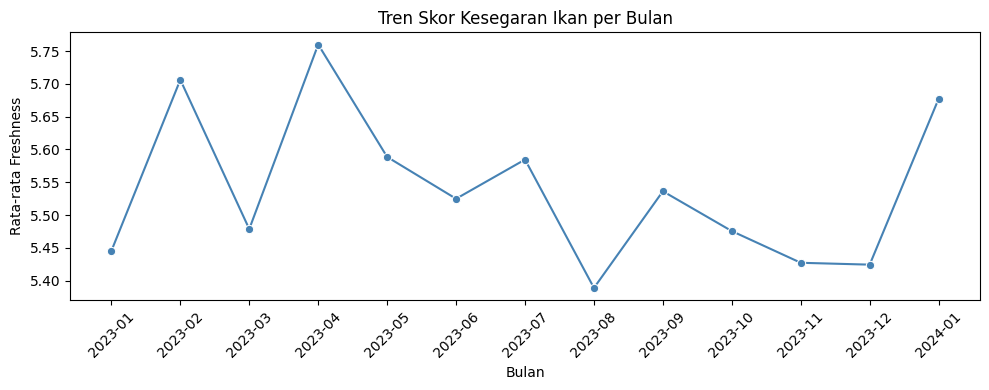

In [6]:
# 5. LINE CHART TREN FRESHNESS PER BULAN
monthly_avg = df.groupby("capture_month")["freshness_score"].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_avg, x="capture_month", y="freshness_score", marker="o", color="steelblue")
plt.title("Tren Skor Kesegaran Ikan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Freshness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 6. PETA RATA-RATA FRESHNESS PER LOKASI

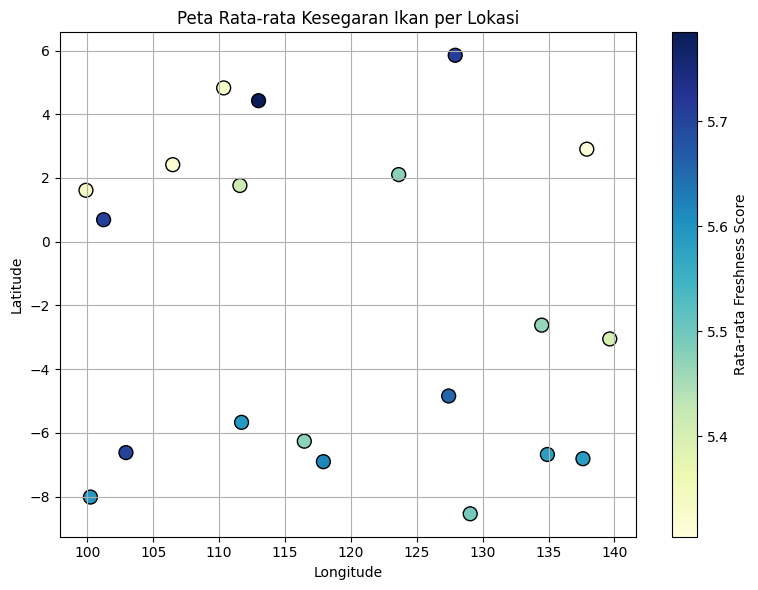

In [7]:
# 6. PETA RATA-RATA FRESHNESS PER LOKASI
location_avg = df.groupby(["location_name", "latitude", "longitude"])["freshness_score"].mean().reset_index()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    location_avg["longitude"], location_avg["latitude"],
    c=location_avg["freshness_score"],
    cmap="YlGnBu", s=100, edgecolor="black"
)
plt.colorbar(scatter, label="Rata-rata Freshness Score")
plt.title("Peta Rata-rata Kesegaran Ikan per Lokasi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()



# 7. CLUSTERING PCA + KMEANS (LINGKUNGAN & FRESHNESS)

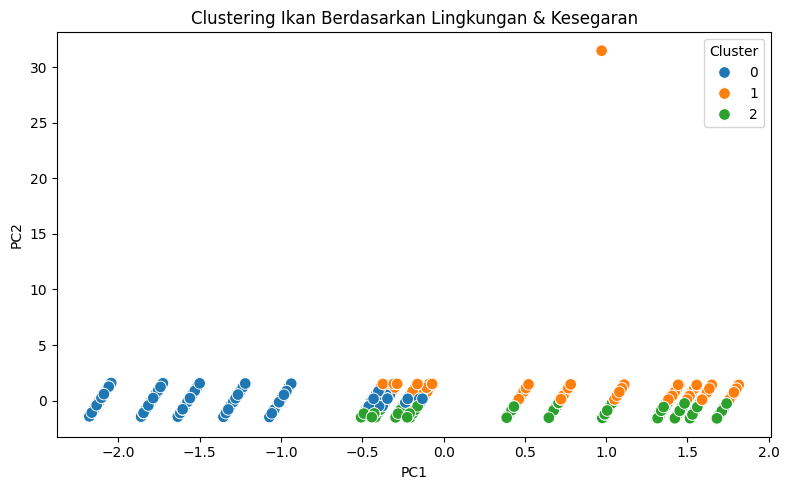

In [8]:
# 7. CLUSTERING PCA + KMEANS (LINGKUNGAN & FRESHNESS)
cluster_features = df[["temperature_celsius", "salinity_ppt", "freshness_score"]].dropna()
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=70)
plt.title("Clustering Ikan Berdasarkan Lingkungan & Kesegaran")
plt.tight_layout()
plt.show()